![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 6: Decision Trees EXERCISES

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (14-01-2020)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-classical-data-analysis-2019/blob/master/06_DECISION_TREES/Session_6_Classical_Data_Analysis_DT_EXERCISES.ipynb)





## EXERCISE 1 - Decision Trees and Cross Validation

Follow the steps to find the best parameters on the Decision Tree classification over a Moon dataset. Try to play with the hyperparameters and reason your results with theory in hand.

### Generate a moons dataset

In [94]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

### Split the train and test

In [2]:
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Use grid search with Cross Validation
Try to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4], 
          'criterion':['entropy', 'gini']}
          
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X, y)

Fitting 3 folds for each of 588 candidates, totalling 1764 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1764 out of 1764 | elapsed:   17.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                     

### Find the best estimator for GridSearch

In [4]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=23,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [5]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 23, 'min_samples_split': 2}

In [7]:
tree_clf = DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes = 23, min_samples_split = 2, 
                                  random_state=42)

In [14]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=23,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

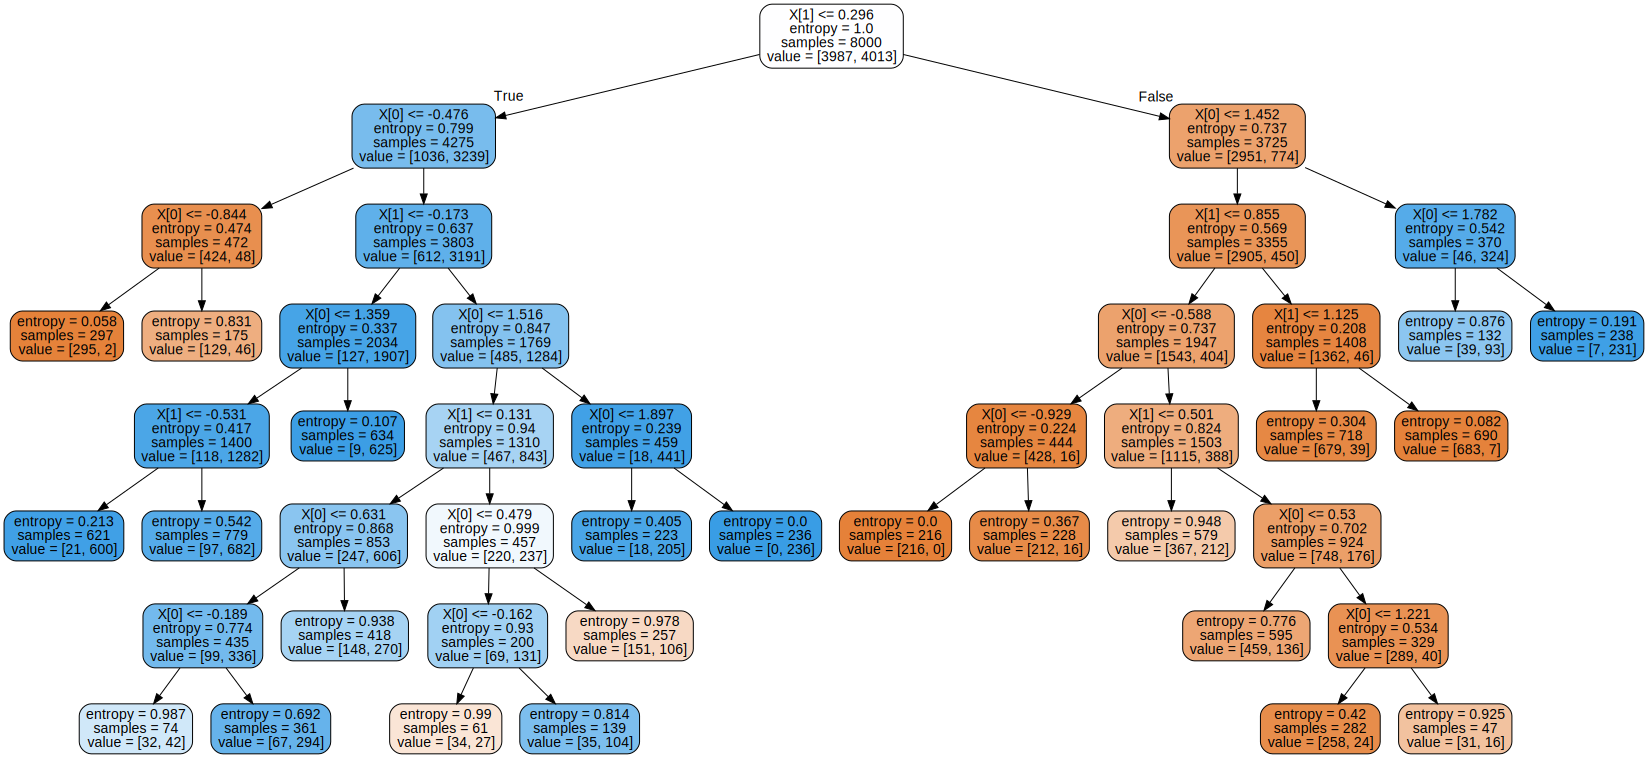

In [35]:
# Visualize the Decision Tree (you need to have graphviz installed)
from graphviz import Source
from sklearn.tree import export_graphviz
import os

IMAGES_PATH = '/Users/laurencewilliams/BTS/Classical_Data_Analysis/bts-mbds-classical-data-analysis-2019/Own_Notebooks'

# Call the export with Graphviz
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "moon_tree.dot"),
        #feature_names=moon.feature_names[2:],
        #class_names=moon.target_names,
        rounded=True,
        filled=True
    )

# Load the file in the notebook
Source.from_file(os.path.join(IMAGES_PATH, "moon_tree.dot"))

### Visualize the split and the tree growth with the code above

In [38]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

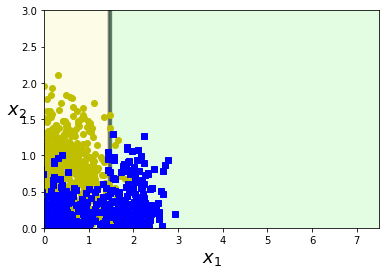

In [43]:
plot_decision_boundary(tree_clf, X_test, y_test, iris=False)

### Evaluate the accuracy with test
What did you get?

In [44]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.87


## EXERCISE 2 - My first random forest

You are already acquanted with the pitfalls of Decision Trees and might have an intutition of why Random Forest might be a good approach to address those pitfalls.

In this exercise you will build your own random forest from scratch. Be creative, make use of for loops or any programmnig tool that you like. Let's go:

## Part 1 - splitting the dataset to build a forest

Go on with the exercise above, use the same datraset. But this time generate 1000 subsets of the **training** dataset, with each containing 100 instances selected in a random manner.

You can code it by your own or use [Scikit-Learn ShuffleSplit class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.model_selection import ShuffleSplit

X, y = make_moons(n_samples=100, noise=0.4, random_state=0)
rs = ShuffleSplit(n_splits=1000, test_size=.2, random_state=0)
print(rs)
print(rs.get_n_splits(X))

ShuffleSplit(n_splits=1000, random_state=0, test_size=0.2, train_size=None)
1000


In [9]:
X[43]

array([-1.1357604 ,  0.01864115])

In [7]:
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [43 62  3 71 45 48  6 99 82 76 60 80 90 68 51 27 18 56 63 74  1 61 42 41
  4 15 17 40 38  5 91 59  0 34 28 50 11 35 23 52 10 31 66 57 79 85 32 84
 14 89 19 29 49 97 98 69 20 94 72 77 25 37 81 46 39 65 58 12 88 70 87 36
 21 83  9 96 67 64 47 44] TEST: [26 86  2 55 75 93 16 73 54 95 53 92 78 13  7 30 22 24 33  8]
TRAIN: [79  1 45 28 60 52 25 39 97 44 16 55 83 49 22 70 47  4 82 94 53 66 26 84
 31 63  8 75 98 57 71 99 86 96 69 24 30 13 40 56 68 95 81 19 38 91 54 32
 51 85 11 89 90 36 65 88 41 14 27 50 20 46 67 35 62  2 59 23 58 43 10  0
 73 21 77 42  3 93 48 34] TEST: [18 29 64 92 72 87  5 15 12 17 61 76  9 78 80  7 33  6 37 74]
TRAIN: [52 73 80 74 62 30 99 70 18 89 81 83 60 25 56 17  1  8 16 55 48 92  0 36
 40  5 94 98 49 34 91 33 21 90  7 45 79 85 68 31 65 44 50 26 75 95 78 41
  9 39 93 97 29 77 20 46 51 53 23 27  2 28 37 54 10 84 11 32 43 87 69 61
 86 35 76  3 82 67 24 88] TEST: [42 96 58 14 72  4 47 64 57 63  6 38 13 59 66 71 15 22 19 12]
TRAIN: [57 61 47 76 12  9 43 17 31  3 98

 26 21 23 57 29 62 61 39] TEST: [70 65 77 93 73 43 71 25 49 18 15 81 78 72 38 80 46  3 85 13]
TRAIN: [19 80 97 84 39 55  5 95 98 16 23  0 29 46 92 56 59 15 53 52  6 58  2 13
 18 57 14 47 66 22 73 72 65 60 50  8 40 35 44 94 49 99 82 67 71 86 37 12
 51 28 27 68  3 10 63 70 24 77 30 43 76 90  1 26 42 61  7 89 38 74 17 62
 64 36 75 25 54 79 32  9] TEST: [81 21 20 41 31 96 85 11 83 87 33 34 91 45 93 69 78  4 48 88]
TRAIN: [52 19 68  2 24 82 54 27 38 81 37  9 49 31  6 29 95 25 51 28 11 21 78 55
 53 93 85 65 64 59 88 96 48 33 40 17 16 36 23 60 91 80 10 44 58 14 39 13
 83  5  4 15 76 94 43 61  3 75 92 50 74  1 99 46 72  8 41 12 47 97 89 71
 84 32 35 26 45 69 86 22] TEST: [30 20 87 62 77 42 34 18 73 63 67 90 70  7 98 66 56 57  0 79]
TRAIN: [59 69 13 28 39 57 71 48 58  8 96 94  3 37  7 60 91 75 87 15  9  4 90 32
 35 76 98 63 66  2 88 51 45  5 36 42  1 74 56 26 61 53 92 65 30 73 17 54
 99 55 34 19 43 77  6 38 97 85 40 68 78 67 31 79 11 25 95 64 22 49 44 52
 47 12 16 10 27 82 14 21] TEST: [80 86 6

 69 31 55 54 87 66 23 39] TEST: [86 41 80 18  3 72 52 64 38 42 47 43 46 91 99 88 34 58 11 10]
TRAIN: [71 18 53 57 39 47 10 27 42 96 16 31 98 79 26 78 24 84 48 46 20 32 87 28
  2 90 93 50 36 37 70 83 99 33 68 72 38 25 58  4 44 17 64 55  1 30 15 51
 65 49 74  9 34  5 61 60 66 11 73 63 59 40 52  6 12 41 23 19 82  7 67  8
 13 35 85 22 56 88 97 80] TEST: [92 91 14 43 94 69 86 89 21 77 29 81 95 62 76  0  3 45 54 75]
TRAIN: [61 27 37 53 84 54  3 71 80 12 47 76 32 87 17 26 48 59  7 58 96 62 55 16
 69 82 95 97  9 89  2  4 68  5 40 86 34 77 92 13 21  1  6 41 24 85 78 25
 18 38 20 98 51 75 29  8 52 81 79 23 60 14 88 39 94 19 56 74 31 36 10 70
 44  0 45 63 93 66 67 73] TEST: [83 15 49 72 42 28 30 99 22 90 50 65 64 35 33 11 91 57 43 46]
TRAIN: [62 37 30 60 93 46 99 54 50 58 51 83 52 12 74 28 48 76  7 84 68 31 34 27
 15 11 67 55 44 82 39 89 17 26 72 63 56 77 85 96 95 36 92 20 94 64 91 35
 29  3  4 97 22 78  6 70 10 86 66 75 14 42 23  8  0 87 98 65 61 25 33 71
 81 69 43 41 16 80 79 45] TEST: [47 53 2

In [97]:
from sklearn.model_selection import ShuffleSplit
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
print(rs)
print(rs.get_n_splits(X))

ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
10


In [98]:
for train_index, test_index in rs.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))

TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200
TRAIN: 800 TEST: 200


In [100]:
X[349]

array([2.34192327, 0.17459018])

In [68]:
for train_index, test_index in rs.split(X):
    X_train = []
    for i in train_index:
        X_train[.append(X[i])

## Part 2 - Train each subset!

Use the best hyperparameters for the whole moons dataset that you found in the previous exercise. **Train one Decision Tree on each subset** (the subsets you just created in Part 1). 

Evaluate the 1000 Decision trees you trained over the test set. Create an empty list, and use the method you prefer to loop through each tree, evaluating over the test set and appending the results over the empty list. Once you have your list of accuracies, calculate the mean of all of them.

This will most likely perform worse than the Decision Tree you trained with the whole train dataset, achieving not more than 80%. 

Place your final mean accuracy below.

In [82]:
clf_tree1 = DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes = 23, min_samples_split = 2, 
                                  random_state=42)

In [115]:
trees_accuracies = []

In [116]:
for train_index, test_index in rs.split(X):
    X_train = []
    X_test = []
    y_test = []
    y_train = []
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for j in test_index:
        X_test.append(X[j])
        y_test.append(y[j])
    clf_tree1.fit(X_train, y_train)
    y_pred = clf_tree1.predict(X_test)
    trees_accuracies.append(accuracy_score(y_test, y_pred))     

In [117]:
trees_accuracies

[0.86, 0.83, 0.865, 0.815, 0.845, 0.89, 0.86, 0.885, 0.84, 0.86]

In [126]:
round(np.mean(trees_accuracies), 3)

0.855

## Part 3 - keeping the most frequent predictions

Now we will keep only the most frequent predictions.

For each test set **INSTANCE** or **SAMPLE**, generate the predictions of the 1000 Decision trees, and keep only the most frequent ones.

For instance:

* Test $y_0$ - prediction 1
* Test $y_1$ - prediction 1
* Test $y_2$ - prediction 0
* Test $y_3$ - prediction 1
* Test $y_4$ - prediction 1

You will keep prediction = 1, as it is the most frequent. You can use SciPy's mode() function to achieve this. 

Now we have a majority-vote predictions over the whole test set, having the most common predictions for each instance over the test set. Keep this value as an array with the same shape as y_test.

In [170]:
most_predictions = []

In [171]:
import statistics 
from statistics import mode 
for train_index, test_index in rs.split(X):
    X_train = []
    X_test = []
    y_test = []
    y_train = []
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for j in test_index:
        X_test.append(X[j])
        y_test.append(y[j])
    clf_tree1.fit(X_train, y_train)
    y_pred = clf_tree1.predict(X_test)
    try:
        most_predictions.append(mode(y_pred))
    except:
        most_predictions.append(1) #favour 1 over 0;

In [174]:
most_predictions

[0, 0, 0, 1, 0, 1, 0, 1, 0, 1]

In [176]:
import pandas as pd
df = pd.DataFrame()
df['Y_test'] = range(10)
df['Prediction'] = most_predictions
df

,Y_test,Prediction
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
5,5,1
6,6,0
7,7,1
8,8,0
9,9,1


## Part 4 - let's see what happens for accuracy!

Use the array that you produced above with the most common predictions for each test instance. Compare it with the y_test set using the accuracy_score method.

Basically, you should do the following:

accuracy_score(my_y_test_dataset, my_most_common_predictions_over_y_dataset)

You might need to reshape your most common predictions array so it will be the same shape as the y_test.

You should get a slightly higher accuracy, maybe up to 1.5% higher. You just trained your first Random Forest classifier!!! Congratulations! Go an have a beer!

But first, comment on why do you think that you are getting a better accuracy. Reflect on Decision Trees instabilities and why creating a Randomized Forest of Decision Trees might yield better results.

In [185]:
most_predictions

[0, 0, 0, 1, 0, 1, 0, 1, 0, 1]

In [186]:
most_common_pred = 20*most_predictions

In [192]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [194]:
accuracy_score(y_test, most_common_pred)

0.45

## Place your reflections here: